## 1. *Bachground*
The situation of the customers churn in a given organization is defined as the loss of the customers or customers stop using the company's services. Companies like banks, telecommunication, insurance and many more need to use customers churn analysis as it has proved that, it is less expensive to retain existing customers than to acquire the new ones. The existing customers purchase more than the new ones too. Introducing the new products or services to existing customers is easier than to the new customers. So, the companies need to use the data scientist to analyze the historical company's data to support the decision-makers by giving them an indication of the customers who are about to churn and the cause of the customer's decline.
         
   ###### The objectives of this project are:
* To investigate and visualize the predictors which contribute the most in customers leaving,
* To build the machine leaning algorithms which classify the customers churn based on the available historical data,
* To select the algorithm which has the best performance(high Recall,Accuracy) compare to the others, and that algorithm can be used to preduct the new data.

*Let's get started!*

<u>Explanaition of the dataset</u> <br />The data has 14 features(columns or attributes), there are categorical columns, continuous columns and target column.


In [1]:
#Here, I load the necessary libraries that I will need to visualize the distribution 
# of the features to the target attribute 
# and to build my classification models.
#Important mathematical and dataframe libraries and html univariate report
import numpy as np 
import pandas as pd
import pandas_profiling as pf
# For visualization and ploting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Support functions
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import svm
from imblearn.over_sampling import ADASYN, SMOTE

# Scoring functions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score



Using TensorFlow backend.


In [2]:
#Here, I read the data and lookhttps://www.geeksforgeeks.org/python-pandas-df-size-df-shape-and-df-ndim/ at their first 10 raws.
churnData = pd.read_csv('../input/predicting-churn-for-bank-customers/Churn_Modelling.csv')
churnData.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [3]:
# checking the dimension of my dataframe
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Univariate analysis

In [4]:
# Generated a profile report about the data set using pandas profiling
# report to be added in html format
churn_data_report = pf.ProfileReport(churnData)
churn_data_report
# churn_data_report.to_file('churn_data_report.html')

## 2. **Data Manipulation**

The data features names are mixed in small and capital letters, I will make them all small letters.<br />
Checking if there is a missing data for data cleaning<br />
Dropping three first Irrelevant attributes for features selection.

In [5]:
#Let me change the columns names of my dataset to lower case.
churnData.columns = map(str.lower, churnData.columns)

In [6]:

# Here, I am goint to check if there is a missing data.
churnData.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

Lucky me, there is zero missing values in my data,so, *data cleaning* becomes much easy to me.<br />
Now, the *features selection* is my next step, according to my target, I am going to drop the first three columns.

In [7]:
#Here, I am going to remove the first three columns.
churnData =  churnData.iloc[:, 3:14]
# churnData.drop(columns = [list of columns], axis =1,inplace = True)

## 3. Descriptive Data Analysis

In this section, I will do the distribution of the features according to my target column.<br />
* Distribution of the target column(exited) itself.
* Distribution of the continuous attributes concerning the target column.
* Distribution of the categorical columns according to the target column.
<br />I will add the comments to show clearly how the features are contributing to the customer's churn.

      Proportion of the churned and stayed customers.

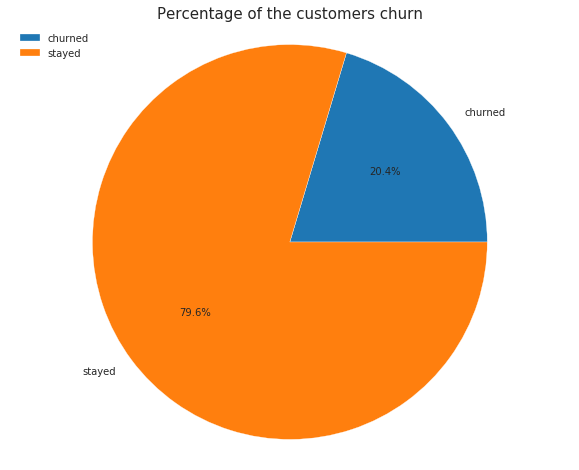

In [8]:
#The proportion pie chart of the churned and retained customers.
labels = 'churned', 'stayed'
sizes = [churnData.exited[churnData['exited']==1].count(), churnData.exited[churnData['exited']==0].count()]
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Percentage of the customers churn", size = 15)
plt.legend()
plt.show()


*In this above pie chart, it shows that in our dataset the churned customers occupy 20% of the entire population, the churned customers have the small percentage then, here I will have to find the prediction model which has the high accuracy in order to be able to track those churned customers.*
    

### Bivariate Analysis    
     Now, I going to evaluate the contribution of the categorical attributes to the target (exited) column
   ##### Visualizing of how customers churn change based on their gender group

exited     0     1
gender            
Female  3404  1139
Male    4559   898


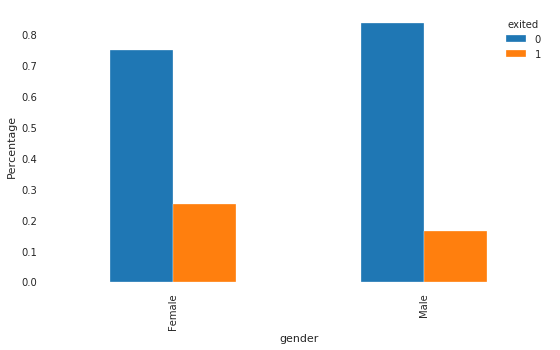

In [9]:
#Visualizing how customers churn based on their gender group
print(pd.crosstab(churnData['gender'],churnData['exited']))
gender = pd.crosstab(churnData['gender'],churnData['exited'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('gender')
p = plt.ylabel('Percentage')


From the above histogram chart, it shows that the female churned more than the male gender.


 ##### Now, I am going to check the variation of the customers churn based on their geographical location


exited        0    1
geography           
France     4204  810
Germany    1695  814
Spain      2064  413


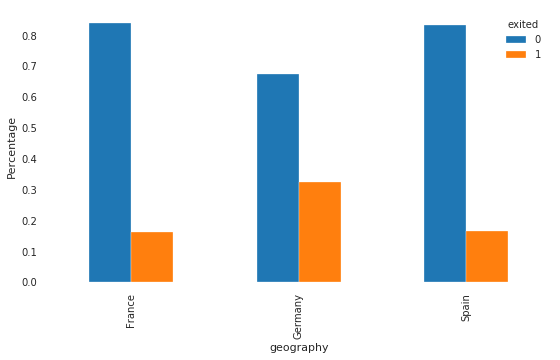

In [10]:
#Visualizing how customers churn based on their Geo-Location
print(pd.crosstab(churnData['geography'],churnData['exited']))
Location = pd.crosstab(churnData['geography'],churnData['exited'])
Location.div(Location.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('geography')
p = plt.ylabel('Percentage')


From the above visualization, we can see that Customers located in Germany churn more than those located from France and Spain.

#### Here, I need to check how the attribute called <u>hascrcard</u> ('which means if the customer has a credit card or not') is affecting the customers churn. 

exited        0     1
hascrcard            
0          2332   613
1          5631  1424


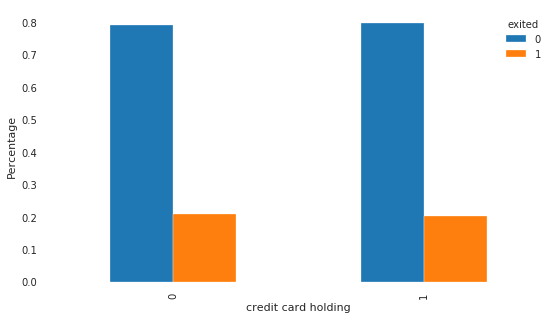

In [11]:
#Visualizing how customers churn based on having credit card information
print(pd.crosstab(churnData['hascrcard'],churnData['exited']))
creditCard = pd.crosstab(churnData['hascrcard'],churnData['exited'])
creditCard.div(creditCard.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('credit card holding')
p = plt.ylabel('Percentage')


From the above visualization, we can see that Customers with the credit cards (1 in legeng) churn more than those who do not have the credit cards.

#### Let me check also how the situation of the customer being active or not is affecting the customers churn too.



exited             0     1
isactivemember            
0               3547  1302
1               4416   735


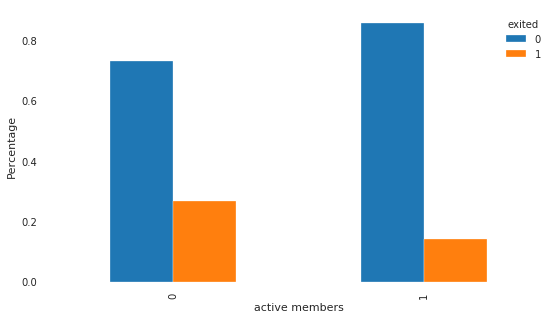

In [12]:
#Visualizing how customers churn based on being active information
print(pd.crosstab(churnData['isactivemember'],churnData['exited']))
actives = pd.crosstab(churnData['isactivemember'],churnData['exited'])
actives.div(actives.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('active members')
p = plt.ylabel('Percentage')


Not surprisingly, in the above histogram, the zero in legend above shows the inactive this means that the inactive customes churn more than the active ones.

In this descriptive analysis, we note the following:

 * Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers, now the bank needs to put more effort to the more churning location.
 * The proportion of female customers churning is also greater than that of male customers and the majority of the female is less then the male majority. Here the bank needs to investigate why the female are churning more.
 
 * Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
 
  * Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive members is quite higher than the active ones, like a data scientist, this is a good indication to suggest the bank turn those inactive customers into an active group as they will increase the bank's revenue.



        The analysis of the contribution of the continuous attributes to customers churn situation.

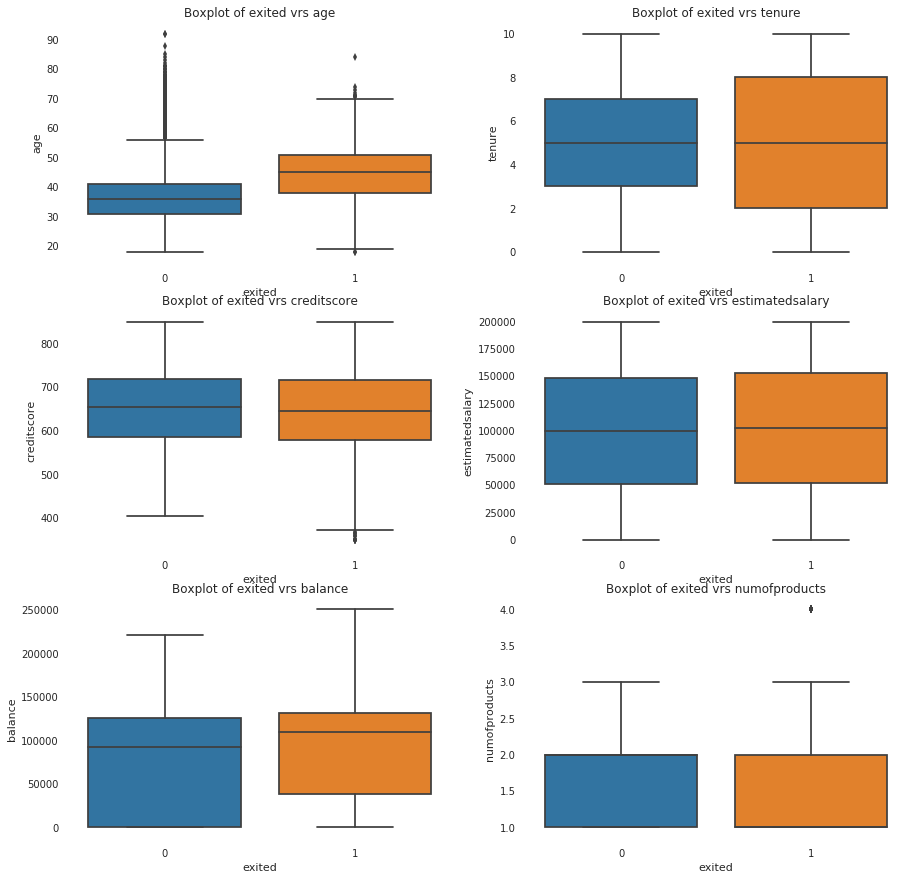

In [13]:
# # The contribution of the continuous attributes to the customers churn (exited) column.
# # Relations based on the continuous data attributes
# continuous = ['age', 'tenure', 'creditscore', 'estimatedsalary', 'balance','numofproducts']
# fig = plt.subplots(figsize = (15,15))
# for i,j in enumerate(continuous):
#   plt.subplot(3,2,i+1)
#   sns.boxplot(x='exited', y = j , data=churnData)
#   plt.title("Boxplot of exited vrs {}".format(j))
# plt.show()
 

From the above subplot where 0 means stayed and 1  means the churned customers. We note the following:



   *  Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
   
   *  The product and the salary have an insignificant effect on the likelihood to churn.
   
   * There is insignificant difference in the credit score distribution between retained(0) and churned(1) customers.
   * The older customers are churning at more than the younger ones. The bank may need to review their target market or review the strategy for retention between the different age groups. An idea, can the bank approaches the retired people to increase the older customers' group? 
   
   * In the tenure, the clients who spent long time with the bank are more likely to leave compared to those that are of average time.
   
##### Now, we are going to visualize the correlation between the continuous features and here we can see that our features are nor strongly correlated, so, they won't cause any redundancy effect in our model building.
  
  


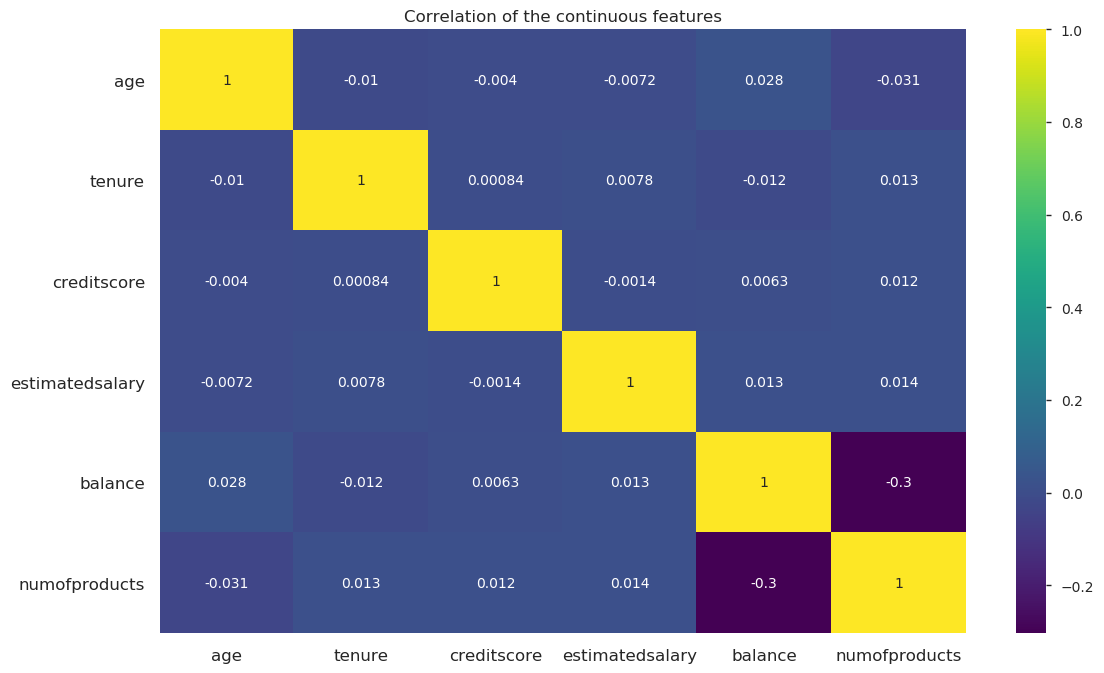

In [14]:
# #Selecting the continuous columns and view the correlation between them.
# churnData_cont = churnData[["age","tenure","creditscore","estimatedsalary","balance","numofproducts"]]
# plt.figure(figsize=(13,8), dpi=100)
# sns.heatmap(churnData_cont.corr(), xticklabels=churnData_cont.corr().columns, yticklabels=churnData_cont.corr().columns, cmap="viridis", annot=True)
# plt.title("Correlation of the continuous features")
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

### Features engineering
In the step, I performed the features engineering process by transforming the categorical columns into encoding, later on, I will do features standardization to improve the model performance.

In [15]:
# Encoding the categorical features into numeric
#Copy the churnData dataframe to data_copy to keep the orginal data before features engineering process
data_copy = churnData.copy()
catfeat = ['geography', 'gender']
encode_dict = {}
for i in catfeat:
  t = data_copy.groupby([i])['balance'].mean().sort_values(ascending =True).index
  encode_dict[i] = {k:i for i,k in enumerate(t,0)}
for i in catfeat:
  data_copy[i] = data_copy[i].map(encode_dict[i])  

In [16]:
data_copy.head()

creditscore  geography  gender  age  tenure    balance  numofproducts  \
0          619          1       0   42       2       0.00              1   
1          608          0       0   41       1   83807.86              1   
2          502          1       0   42       8  159660.80              3   
3          699          1       0   39       1       0.00              2   
4          850          0       0   43       2  125510.82              1   

   hascrcard  isactivemember  estimatedsalary  exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0


After we encode the categorical data, we can see the geagraghy attribute becomes France=1, Spain=0, Germany=2.
The gender attribute becomes Female=0 and Male=1 

In [17]:
churnData['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
data_copy['geography'].unique()

array([1, 0, 2])

### Data leakage 
Data leakage refers to a mistake made by the creator of a machine learning model in which they accidentally share information between the test and training data-sets. Typically, when splitting a data-set into testing and training sets, the goal is to ensure that no data is shared between the two. Here I split the data before performing the standardization or normalization to avoid the data leakage issue.

0    0.7963
1    0.2037
Name: exited, dtype: float64


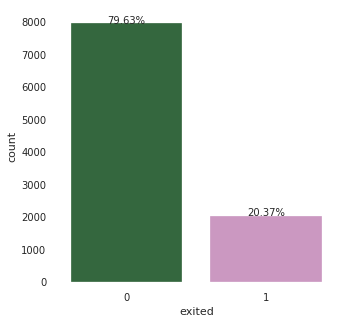

In [19]:
#Here, I am going to view the proportion of our target before performing the overbalancing or underbalancing
from collections import Counter
Counter(churnData['exited'])

print(churnData['exited'].value_counts(normalize=True))
total = float(len(churnData))
# plt.figure(figsize=(5,5))
# ax = sns.countplot(churnData['exited'],palette='cubehelix')
# for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x()+p.get_width()/2.,
#            height + 3,
#            '{:.2f}%'.format((height/total)*100),
#            ha="center")
# # plt.savefig('targ.jpg')
# plt.legend()
# plt.show()

In [20]:
# I split the data into predictors and target columns to overbalance the minority
features = data_copy[['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary']]
target = data_copy[['exited']]

In [21]:
#Resempling with SMOTE to have the same class proportion in our data
from imblearn.over_sampling import SMOTE
smote = SMOTE(
    sampling_strategy='minority',
    random_state=None,
    k_neighbors=5,
    n_jobs=None,
)
feature_smote, target_smote = smote.fit_sample(features, target)

In [22]:
#Convert the dataframe into series to plot it.
SmotingData=target_smote.iloc[0,:]
type(SmotingData)

pandas.core.series.Series

1    1.0
Name: 0, dtype: float64
+-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+
The target variable is balanced with a 50% between the number of churned customers and those non churn customers
+-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+


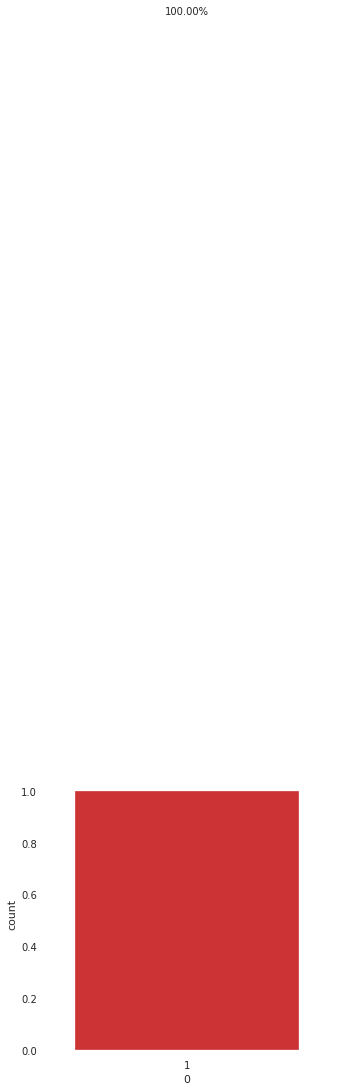

In [23]:
#To see how the data has become balenced after performing smote operation
from collections import Counter
Counter(churnData['exited'])

print(SmotingData.value_counts(normalize=True))
print('+-+'*38)
print('The target variable is balanced with a 50% between the number of churned customers and \
those non churn customers')
print('+-+'*38)
# total = float(len(SmotingData))
# plt.figure(figsize=(5,5))
# ax = sns.countplot(SmotingData,palette='Set1')
# for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x()+p.get_width()/2.,
#            height + 3,
#            '{:.2f}%'.format((height/total)*100),
#            ha="center")
# # plt.savefig('targ.jpg')
# plt.legend()
# plt.show()

## Modeling

In [24]:
# Split data into train and test
# Data splitting section, here we get the training data to pass into our model and the test data to evaluate the performance of the model 

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature_smote, target_smote, test_size=0.2, random_state=1)
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size = .2,random_state = 2)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)



(8000, 10)
(8000, 1)
(2000, 10)
(2000, 1)


In [25]:
#The data need to be standardized to decrease ambiguity and guessworkengineering
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
scal = StandardScaler()
xtrain = scal.fit_transform(xtrain)
xtest = scal.transform(xtest)

### Logistic Regression

Classification Report
+-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1617
           1       0.59      0.16      0.26       383

    accuracy                           0.82      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.82      0.77      2000

+-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+
Confusion Matrix
+-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+


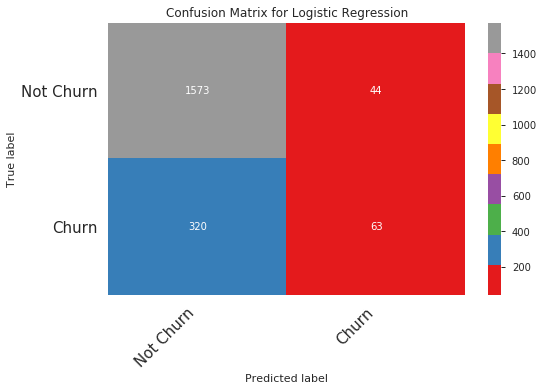

In [26]:
#Imoprting several machine learning classify algorithms 
logreg = LogisticRegression()
logreg = logreg.fit(xtrain,ytrain)
pred = logreg.predict(xtest)

print('Classification Report')
print('+-+'*15)
print(classification_report(ytest,pred))
print('+-+'*15)
print('Confusion Matrix')
print('+-+'*15)
# cm = confusion_matrix(ytest,pred)
# df_cm = pd.DataFrame(cm, index=['Not Churn','Churn'], columns=['Not Churn','Churn'])
# plt.figure(figsize=(8,5))
# heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap='Set1')
# heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=15)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=15)
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.title('Confusion Matrix for Logistic Regression')
# plt.show()


### Gradient Boosting Classifier

In [27]:
radreg = GradientBoostingClassifier(n_estimators=600,max_depth =5,random_state=4)
gradreg = radreg.fit(xtrain,ytrain)
pred = gradreg.predict(xtest)
print(classification_report(ytest,pred))
print('')
print(recall_score(ytest,pred))
print('')
print(roc_auc_score(ytest,pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1617
           1       0.67      0.43      0.52       383

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000


0.4281984334203655

0.6896712637108011


### Random Forest Classifier

In [28]:
randreg = RandomForestClassifier()
randreg = randreg.fit(xtrain,ytrain)
pred = randreg.predict(xtest)
print(classification_report(ytest,pred))
print('')
print(recall_score(ytest,pred))
print('')
print(roc_auc_score(ytest,pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1617
           1       0.74      0.42      0.53       383

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000


0.4177545691906005

0.6915612672792828


### Catboost Classifier

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7531547	best: 0.7531547 (0)	total: 61.9ms	remaining: 1m 1s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.8325284066
bestIteration = 26

Shrink model to first 27 iterations.
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1617
           1       0.79      0.36      0.49       383

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.70      2000
weighted avg       0.85      0.86      0.84      2000




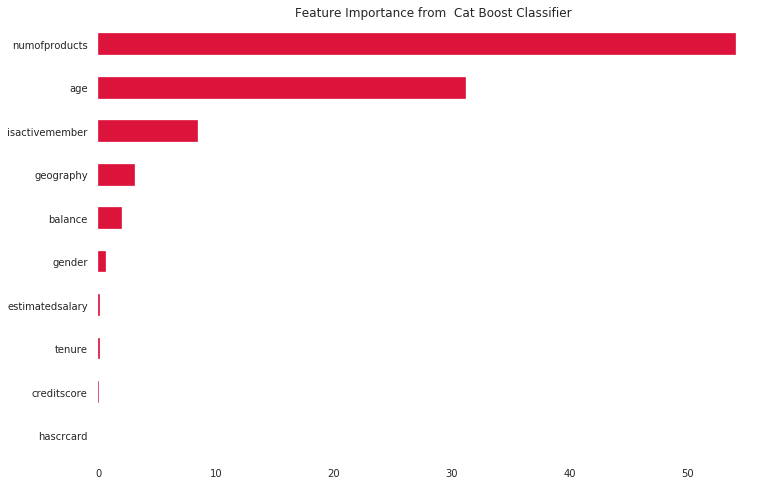

In [29]:
# #Training the model using catBoostClassified algorithm
# catb = CatBoostClassifier(iterations=1000,learning_rate=0.001,
#                           depth = 5,use_best_model=True,eval_metric='AUC',
#                           early_stopping_rounds=10,
#                           verbose = 100)

# catb = catb.fit(xtrain,ytrain,eval_set=(xtest,ytest), plot=True)
# pred = catb.predict(xtest)
# print(classification_report(ytest,pred))
# print('')

# # plotting feature importance
# plt.figure(figsize=(12,8))
# feat_importances = pd.Series(catb.feature_importances_, index=features.columns)
# feat_importances.nlargest(10).sort_values().plot(kind='barh',color = 'crimson')
# plt.title('Feature Importance from  Cat Boost Classifier')
# plt.show()


## Imbalanced Dataset
One of the common issues found 
in datasets that are used for classification 
is an imbalanced class issue.The imbalanced usually reflects an unequal distribution of classes within a dataset, in bank's customers churn data we have less exited data than the stayed one. By building the classification model, the probability of the model to recognize the not churn customers will be high since the algorithm has more data in the training set and to recognize the churned customers will be difficult to the model. To overcome this issue, we use ***imbalanced-learn*** library to improve our model performance.

### Decision Tree with Balanced Algorithm

In [30]:
# #Here, I laod the library which deals with the imbalanced dataset
# #Create an object of the classifier using Decision Tree algorithm.
# bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
#                                 sampling_strategy='auto',
#                                 replacement=False,
#                                 random_state=0)
# #Train the classifier.
# bbc.fit(xtrain, ytrain)
# preds = bbc.predict(xtest)
# #Print out the results of the model
# print(classification_report(ytest,preds))
# print('')
# print(recall_score(ytest,preds))
# print('')
# print(roc_auc_score(ytest,preds))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1617
           1       0.55      0.61      0.58       383

    accuracy                           0.83      2000
   macro avg       0.73      0.74      0.73      2000
weighted avg       0.84      0.83      0.83      2000


0.608355091383812

0.7441899142757032


In [31]:
# # Average accuracy and Recall across 10-folds cross-validation
# crossRecall = cross_val_score(bbc, features, target, cv=10, scoring='recall')
# crossScore = cross_val_score(bbc, features, target, cv=10, scoring='accuracy')
# print("DecisionTree Average Recall", crossRecall.mean())
# print("DecisionTree Average Accuracy", crossScore.mean())

DecisionTree Average Recall 0.6543972761518402
DecisionTree Average Accuracy 0.8184000000000001


### Random Forest with Balenced Algorithm

In [32]:

# #Create an object of the classifier Rondom Forest algorithm.
# bbc = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
#                                 sampling_strategy='auto',
#                                 replacement=False,
#                                 random_state=0)
# #Train the classifier.
# bbc.fit(xtrain, ytrain)
# preds = bbc.predict(xtest)
# #print the performance of the model
# print(classification_report(ytest,preds))
# print('')
# print(recall_score(ytest,preds))
# print('')
# print(roc_auc_score(ytest,preds))


              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1617
           1       0.54      0.68      0.60       383

    accuracy                           0.83      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.85      0.83      0.84      2000


0.6762402088772846

0.7707113227441463


In [33]:
# # Average accuracy and Recall across 10-folds cross-validation
# crossRecall = cross_val_score(bbc, features, target, cv=10, scoring='recall')
# crossScore = cross_val_score(bbc, features, target, cv=10, scoring='accuracy')
# print("RandomForest Average Recall", crossRecall.mean())
# print("RandomForest Average Accuracy", crossScore.mean())

RandomForest Average Recall 0.7005384912585724
RandomForest Average Accuracy 0.8187


### Gradient Boosting with Balanced Algorithm

In [34]:
# #Create an object of the classifier using Gradient Boosting algorithm.
# bbc = BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(),
#                                 sampling_strategy='auto',
#                                 replacement=False,
#                                 random_state=0)
# #Train the classifier.
# grb = bbc.fit(xtrain, ytrain)
# preds = grb.predict(xtest)
# #Print the results of the model
# print(classification_report(ytest,preds))
# print('')
# print(recall_score(ytest,preds))
# print('')
# print(roc_auc_score(ytest,preds))


              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1617
           1       0.48      0.70      0.57       383

    accuracy                           0.80      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.84      0.80      0.81      2000


0.7023498694516971

0.7624303459812598


### Logistic Regression with Balanced Algorithm

In [35]:
# #Create an object of the classifier using Logistic Regression.
# bbc = BalancedBaggingClassifier(base_estimator=LogisticRegression(),
#                                 sampling_strategy='auto',
#                                 replacement=False,
#                                 random_state=0)

# #Train the classifier.
# bbc.fit(xtrain, ytrain)
# preds = bbc.predict(xtest)
# #Print the results of the model
# print(classification_report(ytest,preds))
# print('')
# print(recall_score(ytest,preds))
# print('')
# print(roc_auc_score(ytest,preds))


              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1617
           1       0.36      0.66      0.47       383

    accuracy                           0.71      2000
   macro avg       0.63      0.69      0.63      2000
weighted avg       0.80      0.71      0.74      2000


0.6631853785900783

0.692136906982114


In [36]:
# # Average accuracy and Recall across 10-folds cross-validation
# crossRecall = cross_val_score(bbc, features, target, cv=10, scoring='recall')
# crossScore = cross_val_score(bbc, features, target, cv=10, scoring='accuracy')
# print("LogisticRegression Average Recall", crossRecall.mean())
# print("LogisticRegression Average Accuracy", crossScore.mean())

LogisticRegression Average Recall 0.66620544769632
LogisticRegression Average Accuracy 0.6493


### Cat Boost with Balanced Algorithm

In [37]:
# #Create an object of the classifier using catBoostClassifier algorithm.
# bbc = BalancedBaggingClassifier(base_estimator=CatBoostClassifier(verbose= 0),
#                                 sampling_strategy='auto',
#                                 replacement=False,
#                                 random_state=0)

# #Train the classifier.
# bbc.fit(xtrain, ytrain)
# preds = bbc.predict(xtest)
# #Print the results of the model
# print(classification_report(ytest,preds))
# print('')
# print(recall_score(ytest,preds))
# print('')
# print(roc_auc_score(ytest,preds))


              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1617
           1       0.51      0.68      0.59       383

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.73      2000
weighted avg       0.84      0.81      0.82      2000


0.6840731070496083

0.7647329047925839


In [38]:
# # Average accuracy and Recall across 10-folds cross-validation
# crossRecall = cross_val_score(bbc, features, target, cv=10, scoring='recall')
# crossScore = cross_val_score(bbc, features, target, cv=10, scoring='accuracy')
# print("CatBoostClassifier Average Recall", crossRecall.mean())
# print("CatBoostClassifier Average Accuracy", crossScore.mean())

CatBoostClassifier Average Recall 0.7398048874722303
CatBoostClassifier Average Accuracy 0.8157


In [39]:
# #Average of the Recall across 10-folds on the CatBoostClassifier
# crossRecall.mean()

0.7398048874722303

 After building the model, we can visualize which attributes are contributing the most in customers churning
.

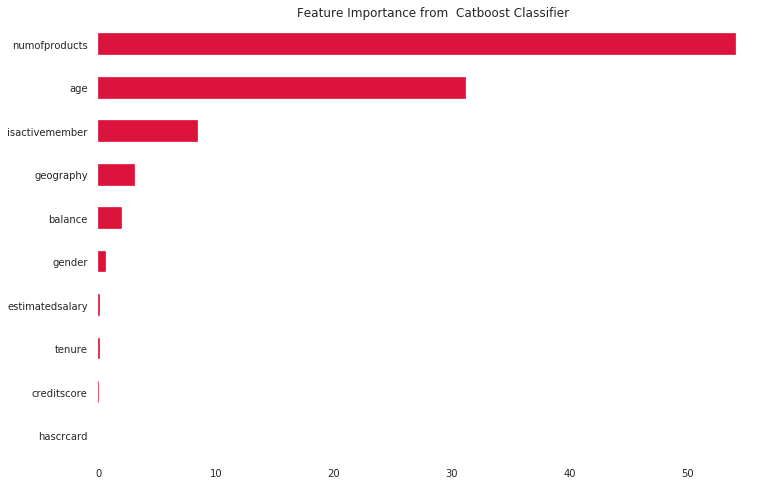

In [40]:

# # plotting feature importance, the features that are contributing more in catBoostClassifier
# plt.figure(figsize=(12,8))
# feat_importances = pd.Series(catb.feature_importances_, index=features.columns)
# feat_importances.nlargest(10).sort_values().plot(kind='barh',color = 'crimson')
# plt.title('Feature Importance from  Catboost Classifier')
# plt.show()

### Hyper-Parameter search on XGBClassifier

In [41]:
# We look for the best parameters to traing XGBClassifier model
m_dep = [5,6,7,8]
gammas = [0.01,0.001,0.001]
min_c_wt = [1,5,10]
l_rate = [0.05,0.1, 0.2, 0.3]
n_est = [5,10,20,100]

param_grid = {'n_estimators': n_est, 'gamma': gammas, 'max_depth': m_dep,
              'min_child_weight': min_c_wt, 'learning_rate': l_rate}

# xgb_cv = RandomizedSearchCV(estimator = XGBClassifier(), n_iter=100, param_distributions =  param_grid, random_state=51, cv=3, n_jobs=-1, refit=True)
# xgb_cv.fit(xtrain,ytrain)

# print("tuned hpyerparameters :(best parameters) ",xgb_cv.best_params_)
# print("accuracy :",xgb_cv.best_score_)
# print(xgb_cv.best_estimator_)


tuned hpyerparameters :(best parameters)  {'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.001}
accuracy : 0.8660003864858229
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


Classification Report
+-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1617
           1       0.72      0.43      0.54       383

    accuracy                           0.86      2000
   macro avg       0.80      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000

+-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+
Confusion Matrix
+-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+


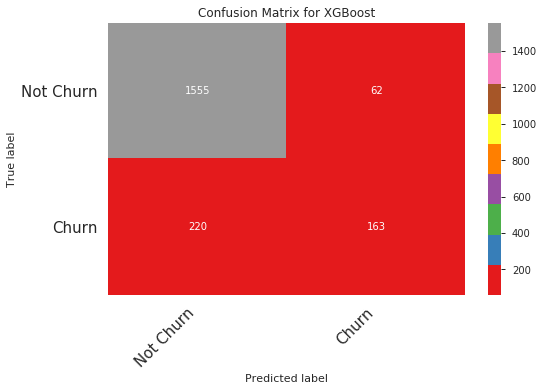

In [42]:
#Traning the XGBClassifier model with the best parameters and check its performance without balanced algorithm
# xgb = XGBClassifier( n_estimators = 100, min_child_weight= 5, max_depth= 5, learning_rate= 0.1, gamma=0.001)
# xgb = xgb.fit(xtrain,ytrain)
# pred = xgb.predict(xtest)

# print('Classification Report')
# print('+-+'*15)
# print(classification_report(ytest,pred))
# print('+-+'*15)
# print('Confusion Matrix')
# print('+-+'*15)
# cm = confusion_matrix(ytest,pred)
# df_cm = pd.DataFrame(cm, index=['Not Churn','Churn'], columns=['Not Churn','Churn'])
# plt.figure(figsize=(8,5))
# heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap='Set1')
# heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=15)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=15)
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.title('Confusion Matrix for XGBoost')
# plt.show()

Classification Report
+-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1617
           1       0.68      0.43      0.53       383

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000

+-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+
Confusion Matrix
+-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+


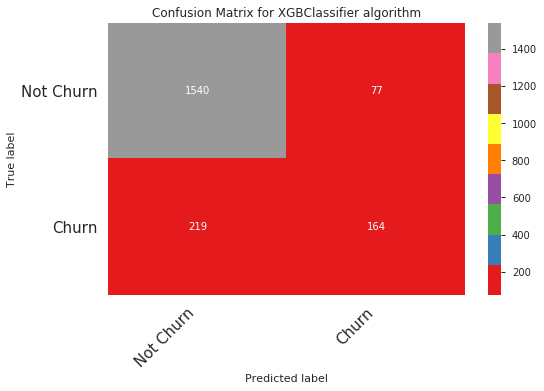

In [43]:
# # Plotting the confusion Matrix of the XGBoost model
# m_dep = [7]
# gammas = [0.01]
# min_c_wt = [1]
# l_rate = [0.2]
# n_est = [100]

# param_grid = {'n_estimators': n_est, 'gamma': gammas, 'max_depth': m_dep,
#               'min_child_weight': min_c_wt, 'learning_rate': l_rate}

# xgb_cv_10 = RandomizedSearchCV(estimator = XGBClassifier(), n_iter=100, param_distributions =  param_grid, random_state=51, cv=10, n_jobs=-1, refit=True)
# xgb_cv_10.fit(xtrain,ytrain)

# pred = xgb_cv_10.predict(xtest)
# roc_auc_score(ytest, pred)
# print('Classification Report')
# print('+-+'*15)
# print(classification_report(ytest,pred))
# print('+-+'*15)
# print('Confusion Matrix')
# print('+-+'*15)
# # cm = confusion_matrix(ytest,pred)
# # df_cm = pd.DataFrame(cm, index=['Not Churn','Churn'], columns=['Not Churn','Churn'])
# # plt.figure(figsize=(8,5))
# # heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap='Set1')
# # heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=15)
# # heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=15)
# # plt.ylabel('True label')
# # plt.xlabel('Predicted label')
# # plt.title('Confusion Matrix for XGBClassifier algorithm')
# # plt.show()

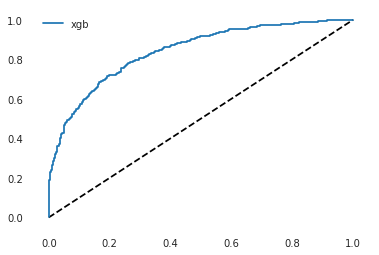

In [44]:
# # Checking the area under the curve of XGBClassifier with 10 folds cross validation
# y_pred_prob = xgb_cv_10.predict_proba(xtest)[:,1]
# fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
# plt.plot([0,1], [0,1], 'k--')
# plt.plot(fpr, tpr, label='xgb')
# plt.legend()

In [45]:
# # View the area under the curve score
# roc_auc_score(ytest, y_pred_prob)

0.8407052353341051

### XGBoost with the balanced algorithm

In [46]:
# #Here, I laod the library which deals with the imbalanced dataset
# #Create an object of the classifier using XGBoost algorithm.
# bbc = BalancedBaggingClassifier(base_estimator=XGBClassifier(),
#                                 sampling_strategy='auto',
#                                 replacement=False,
#                                 random_state=0)
# #Train the classifier.
# bbc.fit(xtrain, ytrain)
# preds = bbc.predict(xtest)
# #Print out the results of the model
# print(classification_report(ytest,preds))
# print('')
# print(recall_score(ytest,preds))
# print('')
# print(roc_auc_score(ytest,preds))


              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1617
           1       0.52      0.67      0.58       383

    accuracy                           0.82      2000
   macro avg       0.72      0.76      0.73      2000
weighted avg       0.84      0.82      0.82      2000


0.6657963446475196

0.7586866695408285


In [47]:
# # Average accuracy and Recall across 10-folds cross-validation
# crossRecall = cross_val_score(bbc, features, target, cv=10, scoring='recall')
# crossScore = cross_val_score(bbc, features, target, cv=10, scoring='accuracy')
# print("XGBoost Average Recall", crossRecall.mean())
# print("XGboost Average Accuracy", crossScore.mean())

XGBoost Average Recall 0.7152661064425769
XGboost Average Accuracy 0.8145


### K- Nearest Neighbors Classifier

In [48]:
#Create an object of the classifier using K-Neighbors Classier.
bbc = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
#Train the classifier.
bbc.fit(xtrain, ytrain)
preds = bbc.predict(xtest)
#Print out the results of the model
print(classification_report(ytest,preds))
print('')
print(recall_score(ytest,preds))
print('')
print(roc_auc_score(ytest,preds))


              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1617
           1       0.42      0.64      0.51       383

    accuracy                           0.76      2000
   macro avg       0.66      0.71      0.68      2000
weighted avg       0.81      0.76      0.78      2000


0.6370757180156658

0.714950969706658


In [49]:
# # Average accuracy and Recall across 10-folds cross-validation
# crossRecall = cross_val_score(bbc, features, target, cv=10, scoring='recall')
# crossScore = cross_val_score(bbc, features, target, cv=10, scoring='accuracy')
# print("KNeighbors Average Recall", crossRecall.mean())
# print("KNeighbors Average Accuracy", crossScore.mean())

KNeighbors Average Recall 0.485540423065778
KNeighbors Average Accuracy 0.5524


### Support Vector Machine with balanced algorithm

In [50]:
# #Here, I laod the library which deals with the imbalanced dataset
# #Create an object of the classifier using Support vector machine algorithm.
# bbc = BalancedBaggingClassifier(base_estimator=svm.SVC(),
#                                 sampling_strategy='auto',
#                                 replacement=False,
#                                 random_state=0)
# #Train the classifier.
# bbc.fit(xtrain, ytrain)
# preds = bbc.predict(xtest)
# #Print out the results of the model
# print(classification_report(ytest,preds))
# print('')
# print(recall_score(ytest,preds))
# print('')
# print(roc_auc_score(ytest,preds))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1617
           1       0.50      0.70      0.58       383

    accuracy                           0.81      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.81      0.82      2000


0.6997389033942559

0.7660722964714013


In [51]:
# # Average accuracy and Recall across 10-folds cross-validation
# crossRecall = cross_val_score(bbc, features, target, cv=10, scoring='recall')
# crossScore = cross_val_score(bbc, features, target, cv=10, scoring='accuracy')
# print("SVM Average Recall", crossRecall.mean())
# print("SVM Average Accuracy", crossScore.mean())

SVM Average Recall 0.7496740075340481
SVM Average Accuracy 0.4655


### Cross Validation on Gradient Boost model with Balanced Algorithm



In [52]:
# #Perform the cross validation data splitting to see the model improvement on many testing set.
# # Here, I used k-fold cross validation with 10 folds
# crossRecallg = cross_val_score(grb, features, target, cv=10, scoring='recall')
# crossScoreg = cross_val_score(grb, features, target, cv=10, scoring='accuracy')
# # The recall on all 10-folds as an arrary
# print("Recall Average:", crossRecallg.mean())
# #The avarega of the recalls across all 10- folds with gradient boosting model
# print("Accuracy Average", crossScoreg.mean())

Recall Average: 0.7476552690041534
Accuracy Average 0.8025


### Conclusion

In this project of classification of the customers' churn situation, I have explored the univariate, bivariate and modeling analysis. the univariate analysis is available in the provided Html file. After using the several classifier machine learning algorithms, balancing the data using a machine learning algorithm and using 10-folds cross-validation, I have come up with the model which performs better than others on our classification problem.
Our interested matrices are <u> Recall</u> and Accuracy, Recall because I need the model with less False Negative *(FN)* meaning that the model which will less predict that 
the customers will not churn but 
truly the customers will churn.

By comparing those several algorithm the Gradient Boosting predict better than others with *74.76%* of Recall metric, this means that it has the probability of *74.76%* to predict the customers who are going to churn. The accuracy of the Gradient Boosting is *80%*.